In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [13]:
import os
print(os.getcwd())  # Shows current directory


/Users/verafombon


In [17]:
import os
print(os.getcwd())

/Users/verafombon


In [27]:
df = pd.read_csv('Churn_Modelling.csv')

In [31]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [39]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

First 5 rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  G

In [ ]:
# Drop irrelevant columns

In [41]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [ ]:
# Visualize the distribution of the target variable

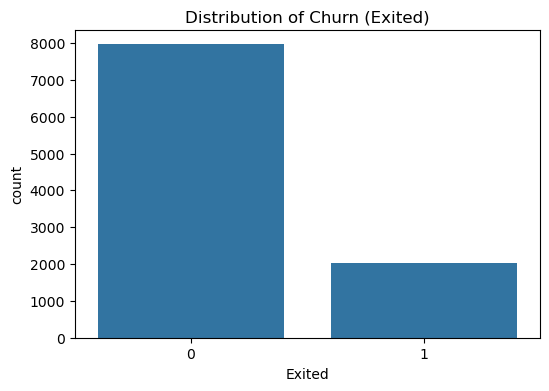

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churn (Exited)')
plt.show()

In [ ]:
# Separate features and target

In [45]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
# Identify categorical and numerical columns

In [47]:
categorical_cols = ['Geography', 'Gender']
numerical_cols = [col for col in X.columns if col not in categorical_cols]


In [ ]:
# Create preprocessing pipeline

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])


In [ ]:
# Preprocess the data

In [51]:
X_processed = preprocessor.fit_transform(X)

In [ ]:
# Split data into train and test sets (80% train, 20% test)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Build the ANN model

In [ ]:
# Compile the model

In [57]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [ ]:
# Define early stopping to prevent overfitting

In [59]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Train the model

In [61]:
history = model.fit(X_train, y_train, 
                    validation_split=0.1, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.7853 - loss: 0.5626 - val_accuracy: 0.8100 - val_loss: 0.4590
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.7925 - loss: 0.4928 - val_accuracy: 0.8100 - val_loss: 0.4226
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.7958 - loss: 0.4650 - val_accuracy: 0.8100 - val_loss: 0.4112
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7981 - loss: 0.4536 - val_accuracy: 0.8300 - val_loss: 0.4040
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.7974 - loss: 0.4581 - val_accuracy: 0.8300 - val_loss: 0.3992
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8104 - loss: 0.4416 - val_accuracy: 0.8375 - val_loss: 0.3923
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.8127 - loss: 0.4307 - val_accuracy: 0.8413 - val_loss: 0.3848
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.8220 - loss: 0

In [ ]:
# Plot training history

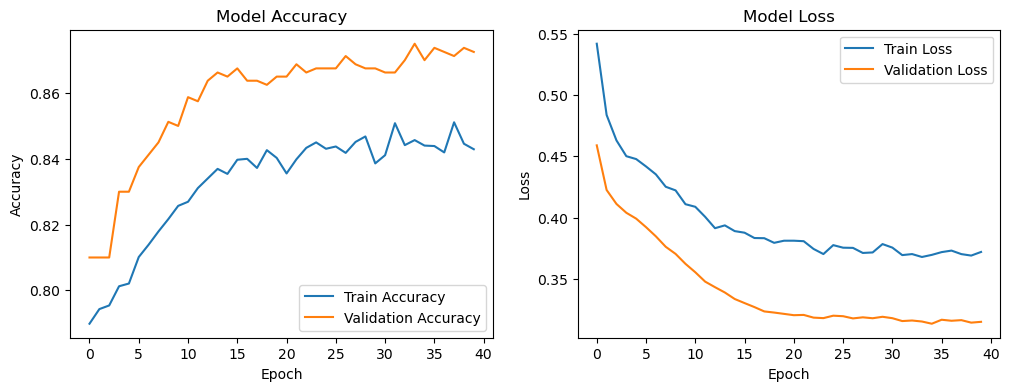

In [63]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# Make predictions

In [65]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


In [ ]:
# Evaluate the model

In [67]:
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Evaluation Metrics:
Accuracy: 0.8615

Confusion Matrix:
[[1553   40]
 [ 237  170]]


In [ ]:
# Feature importance analysis

In [69]:
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
weights = model.layers[0].get_weights()[0]
importance = np.mean(np.abs(weights), axis=1)
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
              Feature  Importance
1                 Age    0.366309
4       NumOfProducts    0.332212
8   Geography_Germany    0.295302
6      IsActiveMember    0.232492
3             Balance    0.213035
10        Gender_Male    0.191814
9     Geography_Spain    0.134230
5           HasCrCard    0.123727
7     EstimatedSalary    0.096540
0         CreditScore    0.059064
2              Tenure    0.042032


In [71]:
# Visualize feature importance

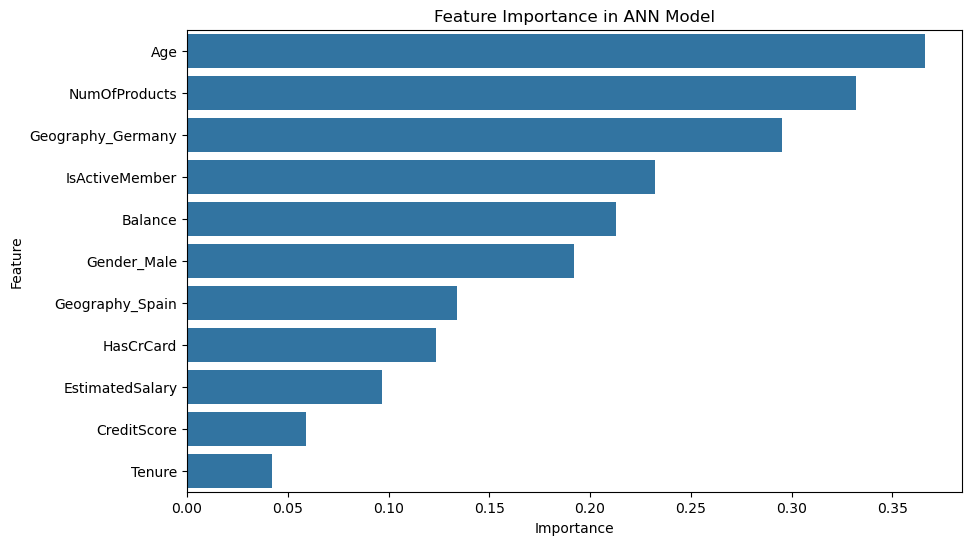

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in ANN Model')
plt.show()